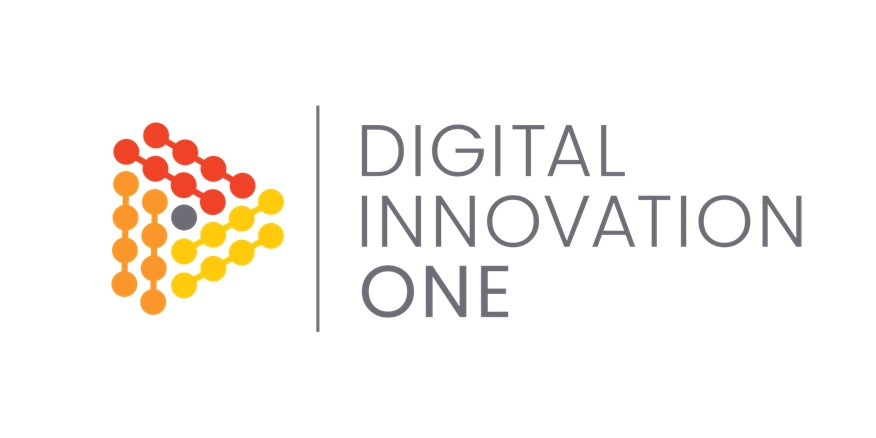

#Análise Exploratório com Pandas

* Importando as bilbiotécas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Configurar o Seaborn para visalização dos gráficos
plt.style.use('seaborn')

* Realizando o Upload do DataFrame


In [4]:
#O arquivo aparecerá à esquerda, disponível para leitura no Google Drive
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


* Realizando a leitura da base para dentro do **Pandas**

In [5]:
df = pd.read_excel('/content/AdventureWorks.xlsx')

* Trazendo o cabeçalho com cinco linhas

In [6]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [ ]:
#Análise da estrutura: quantidade de linhas e colunas
df.shape

(904, 16)

In [ ]:
#Verificando os tipos dos dados em cada coluna
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [7]:
#Qual é a receita?
round(df['Valor Venda'].sum(), 2)

5984606.14

In [8]:
#Qual o custo total?
#É dado pela coluna custo unitário "vezes" a quantidade de produtos:
df['Custo'] = df['Custo Unitário'].mul(df['Quantidade'])

In [9]:
#Custo total é de:
df['Custo'].sum()

2486783.05

In [10]:
#Temos agora que, o lucro é de:
df['Lucro'] = df['Valor Venda'] - df['Custo']
df.head(1) #O número "1" traz somente a primeira linha

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [11]:
#Finalmente, podemos extrair qual foi o Lucro Total
round(df['Lucro'].sum(), 2)

3497823.09

#### Analisando agora o total de dias que um produto leva para chegar até o cliente

In [12]:
df['Tempo Envio'] = df['Data Envio'] - df['Data Venda']
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


* Precisamos saber qual a média, em dias, para cada Marca, para tanto, devemos mudar a coluna Tempo Envio para numérica

In [13]:
#Extraindo apenas dias
df['Tempo Envio'] = (df['Data Envio'] - df['Data Venda']).dt.days
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [14]:
#Verificando o tipo da coluna de Tempo de Envio
df['Tempo Envio'].dtypes

dtype('int64')

In [16]:
#Podemos filtrar a média de dias de envio através da marca dos produtos
df.groupby('Marca')['Tempo Envio'].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo Envio, dtype: float64

#### Verificando se há dados faltante no Data Frame

In [17]:
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo Envio       0
dtype: int64

* Analisando o Lucro por Ano e por Marca

In [18]:
df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: Lucro, dtype: float64

In [19]:
#Ajustando os valores para casas de milhar e decimal
pd.options.display.float_format = '{:20,.2f}'.format

In [20]:
#Verificando de novo, desta vez com valores formatados]
df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [21]:
#Resetando o índice para armazenar no filtro na variável lucro_ano
lucro_ano = df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [23]:
#Tipo dos dados das colunas "lucro_ano"
lucro_ano.dtypes

Data Venda      int64
Marca          object
Lucro         float64
dtype: object

* Analisando o total de produtos vendidos

In [24]:
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

#### Visualizando a Análise por meio de gráficos

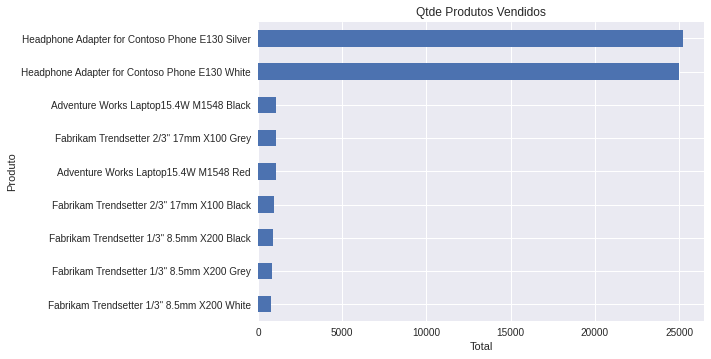

In [27]:
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=True).plot.barh(title='Qtde Produtos Vendidos')
plt.xlabel('Total')
plt.ylabel('Produto');

* Lucro Total por Ano

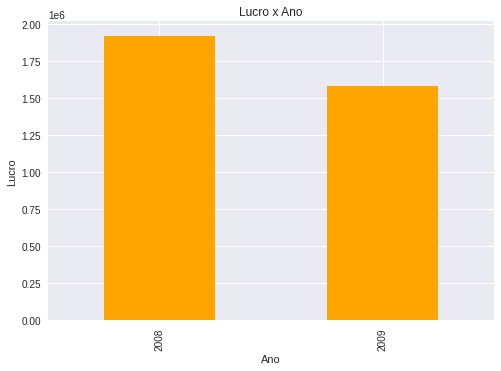

In [ ]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().plot.bar(title='Lucro x Ano', color='orange')
plt.xlabel('Ano')
plt.ylabel('Lucro');

In [ ]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

#### Analisando agora todas as vendas de 2009

In [29]:
df_2009 = df[df['Data Venda'].dt.year == 2009]

In [30]:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


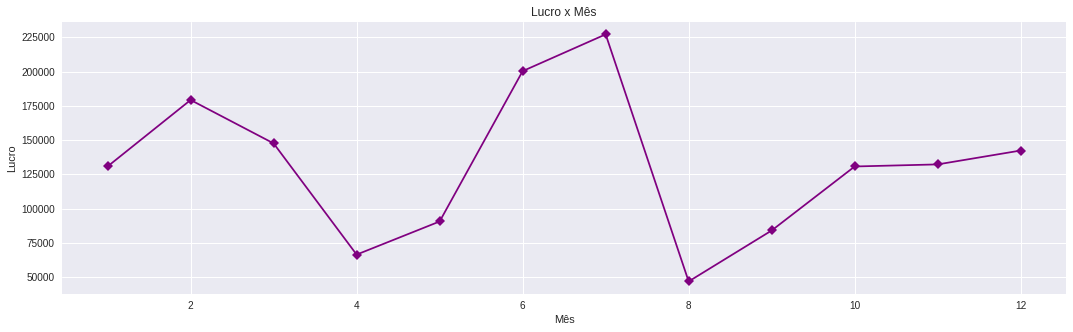

In [56]:
#Iremos analisar o Lucro por mês em 2009 com um gráfico de linha do tempo
plt.figure(figsize=(18,5))
df_2009.groupby(df_2009['Data Venda'].dt.month)['Lucro'].sum().plot(title='Lucro x Mês', marker='D', color='purple')
plt.xlabel('Mês')
plt.ylabel('Lucro');

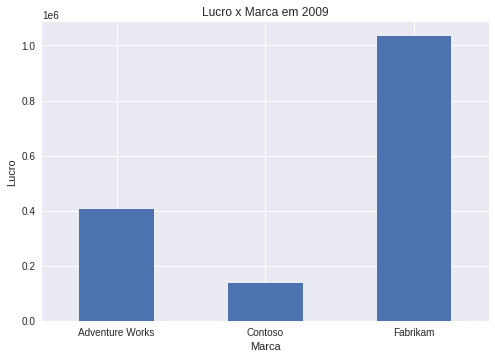

In [ ]:
#Agora, queremos um lucro por marca nos meses de 2009
df_2009.groupby('Marca')['Lucro'].sum().plot.bar(title='Lucro x Marca em 2009')
plt.xlabel('Marca')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal');

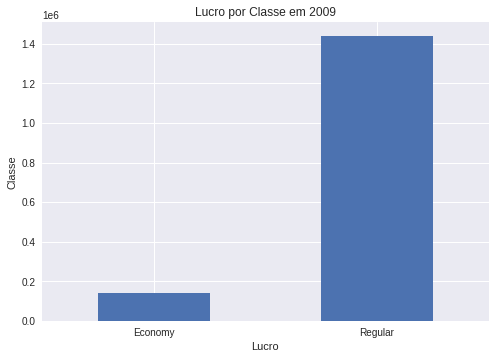

In [ ]:
#Dsta vez vamos descobrir o maior lucro por Classe
df_2009.groupby('Classe')['Lucro'].sum().plot.bar(title='Lucro por Classe em 2009')
plt.xlabel('Lucro')
plt.ylabel('Classe')
plt.xticks(rotation='horizontal');

#### Analisando estatisticamente o Tempo de Envio

In [ ]:
df['Tempo Envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo Envio, dtype: float64

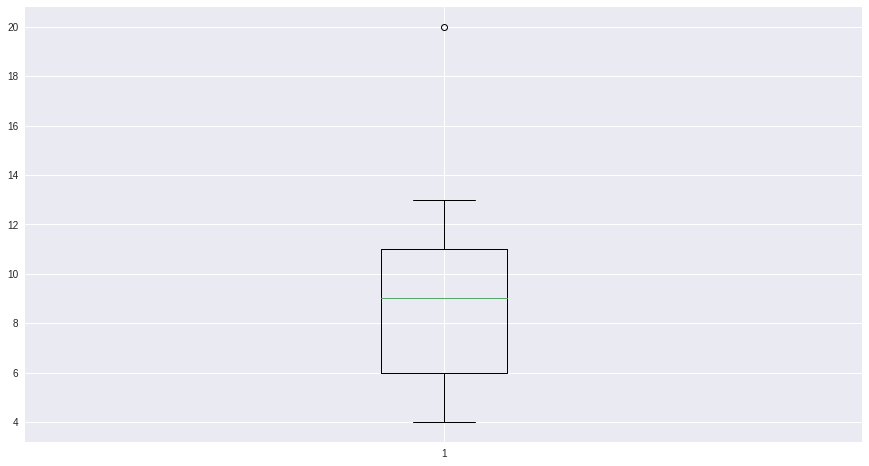

In [51]:
#Gráfico de Caixa (Boxplot)
plt.figure(figsize=(15, 8))
plt.boxplot(df['Tempo Envio'])
plt.show()

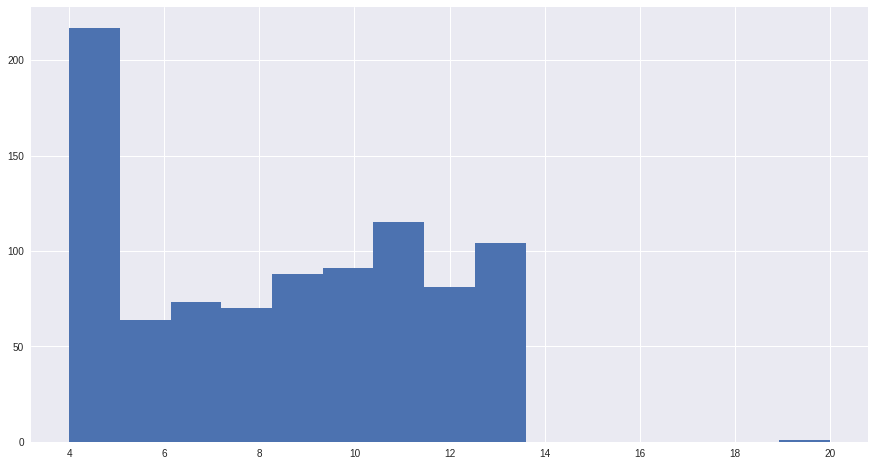

In [44]:
#Histograma
plt.figure(figsize=(15, 8))
plt.hist(df['Tempo Envio'], bins = 15)
plt.show()

In [ ]:
#Tempo máximo
df['Tempo Envio'].max()

20

In [ ]:
#Identificando o Outlier do DataFrame
df[df['Tempo Envio'] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


### Muito obrigado por ter acompanhado até aqui!
____________________________________________________________________________